# Overview
1. Read enriched CVE CVSS v3 data
2. Plot different scatter plots of datasets of NVD CVE CVSS v3 and CISA KEV - by EPSS score vs CVSS v3 Base Score

In [214]:
# Need these for the logic
import pandas as pd

# Need these for the plots
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import plotly.graph_objects as go
import plotly.io as pio
import seaborn as sns

In [215]:
df = pd.read_csv('../data_out/nvd_cves_v3_enriched.csv.gz', compression="gzip")
df

,cve,baseScore,attackComplexity,attackVector,userInteraction,privilegesRequired,confidentialityImpact,integrityImpact,availabilityImpact,metasploit,nuclei,epss,exploitdb,cisa_kev,msrc,gpz,exploit
0,CVE-1999-0199,9.8,LOW,NETWORK,NONE,NONE,HIGH,HIGH,HIGH,False,False,0.00604,False,False,False,False,5
1,CVE-1999-0236,7.5,LOW,NETWORK,NONE,NONE,HIGH,NONE,NONE,False,False,0.00137,True,False,False,False,4
2,CVE-2000-0258,7.5,LOW,NETWORK,NONE,NONE,NONE,NONE,HIGH,False,False,0.00590,False,False,False,False,5
3,CVE-2000-1254,7.5,LOW,NETWORK,NONE,NONE,HIGH,NONE,NONE,False,False,0.00543,False,False,False,False,5
4,CVE-2002-20001,7.5,LOW,NETWORK,NONE,NONE,NONE,NONE,HIGH,False,False,0.00544,False,False,False,False,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141356,CVE-2023-5632,7.5,LOW,NETWORK,NONE,NONE,NONE,NONE,HIGH,False,False,0.00044,False,False,False,False,5
141357,CVE-2023-5638,5.4,LOW,NETWORK,REQUIRED,LOW,LOW,LOW,NONE,False,False,0.00051,False,False,False,False,5
141358,CVE-2023-5639,5.4,LOW,NETWORK,REQUIRED,LOW,LOW,LOW,NONE,False,False,0.00051,False,False,False,False,5
141359,CVE-2023-5642,9.8,LOW,NETWORK,NONE,NONE,HIGH,HIGH,HIGH,False,False,0.00890,False,False,False,False,5


In [216]:

df_cisakev = df[df['cisa_kev'] == True]
df_cisakev

,cve,baseScore,attackComplexity,attackVector,userInteraction,privilegesRequired,confidentialityImpact,integrityImpact,availabilityImpact,metasploit,nuclei,epss,exploitdb,cisa_kev,msrc,gpz,exploit
316,CVE-2010-5326,10.0,LOW,NETWORK,NONE,NONE,HIGH,HIGH,HIGH,False,False,0.13576,False,True,False,False,0
320,CVE-2010-5330,9.8,LOW,NETWORK,NONE,NONE,HIGH,HIGH,HIGH,False,False,0.02343,False,True,False,False,0
1608,CVE-2014-0160,7.5,LOW,NETWORK,NONE,NONE,HIGH,NONE,NONE,True,False,0.97588,True,True,False,False,0
2240,CVE-2014-6271,9.8,LOW,NETWORK,NONE,NONE,HIGH,HIGH,HIGH,True,True,0.97568,True,True,False,False,0
2243,CVE-2014-6287,9.8,LOW,NETWORK,NONE,NONE,HIGH,HIGH,HIGH,True,True,0.97289,True,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140407,CVE-2023-44487,7.5,LOW,NETWORK,NONE,NONE,NONE,NONE,HIGH,False,False,0.52748,False,True,True,False,0
140967,CVE-2023-4863,8.8,LOW,NETWORK,REQUIRED,NONE,HIGH,HIGH,HIGH,False,False,0.41010,False,True,True,True,0
141040,CVE-2023-4966,7.5,LOW,NETWORK,NONE,NONE,HIGH,NONE,NONE,False,True,0.17990,False,True,False,False,0
141178,CVE-2023-5217,8.8,LOW,NETWORK,REQUIRED,NONE,HIGH,HIGH,HIGH,False,False,0.24402,False,True,True,True,0


# Venn Diagrams
Show Venn diagram of Metasploit, Nuclei, CISA KEV CVEs, EPSS, NVD for CVSS v3 CVEs

In [217]:
set_cves_msrc = set(df[df['msrc'] == True].cve)
set_cves_gpz = set(df[df['gpz'] == True].cve)
set_cves_cisa_kev = set(df[df['cisa_kev'] == True].cve)
set_cves_metasploit= set(df[df['metasploit'] == True].cve)
set_cves_nuclei = set(df[df['nuclei'] == True].cve)
set_cves_exploitdb = set(df[df['exploitdb'] == True].cve)
set_cves_epss_01 = set(df[df['epss'] >= 0.1].cve)
set_cves_nvd = set(df.cve)



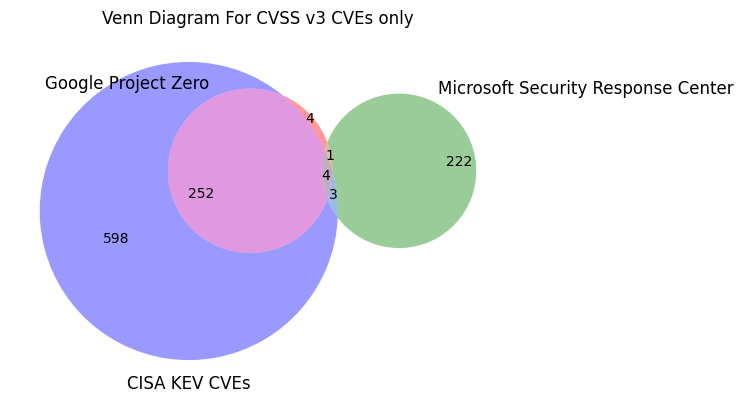

In [218]:
plt.title("Venn Diagram For CVSS v3 CVEs only")
venn3([set_cves_gpz, set_cves_msrc, set_cves_cisa_kev], ('Google Project Zero', 'Microsoft Security Response Center', 'CISA KEV CVEs'))



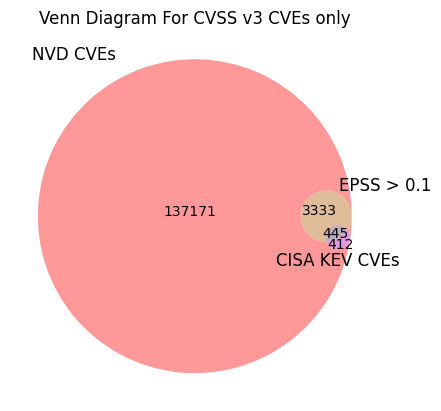

In [219]:
plt.title("Venn Diagram For CVSS v3 CVEs only")
venn3([set_cves_nvd, set_cves_epss_01, set_cves_cisa_kev], ('NVD CVEs', 'EPSS > 0.1', 'CISA KEV CVEs'))

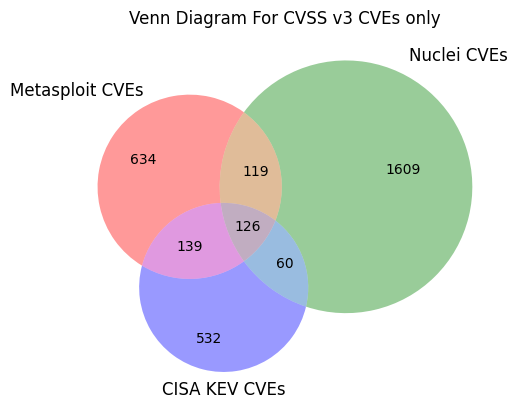

In [220]:
plt.title("Venn Diagram For CVSS v3 CVEs only")
venn3([set_cves_metasploit, set_cves_nuclei, set_cves_cisa_kev], ('Metasploit CVEs', 'Nuclei CVEs', 'CISA KEV CVEs'))

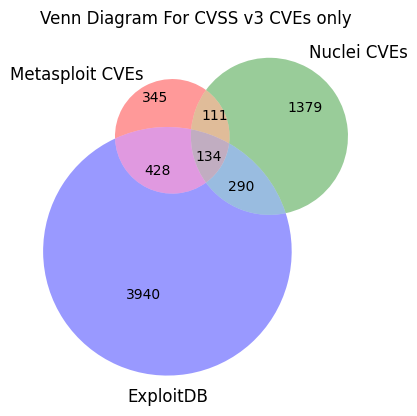

In [221]:
plt.title("Venn Diagram For CVSS v3 CVEs only")
venn3([set_cves_metasploit, set_cves_nuclei, set_cves_exploitdb], ('Metasploit CVEs', 'Nuclei CVEs', 'ExploitDB'))

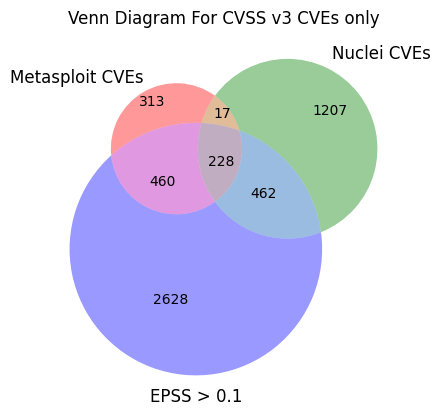

In [222]:
plt.title("Venn Diagram For CVSS v3 CVEs only")
venn3([set_cves_metasploit, set_cves_nuclei, set_cves_epss_01], ('Metasploit CVEs', 'Nuclei CVEs', 'EPSS > 0.1'))


# Scatter Plots

## NVD CVSS v3

In [223]:
def scatter_plot_cvss_epss (df, Title):
    palette1 = ["#ff0000", "#C750BD", "#FF9913", "#FFE900", "#398e14", "#0000FF"]

    g=sns.jointplot(data=df, x="baseScore", y="epss", kind='scatter', height=8, ratio=3, marginal_ticks=True, alpha=.7, hue="exploit", palette=palette1)
    handles, labels = g.ax_joint.get_legend_handles_labels()
    g.ax_joint.legend(handles=handles, labels = ['CISA KEV', 'both metasploit & nuclei', 'metasploit only', 'nuclei only', 'exploitdb, and not in metasploit or nuclei', 'other'], title="Exploit Type", loc='lower center', bbox_to_anchor=(1.5, 1))
    g.plot_marginals(sns.histplot, multiple="stack")
    g.fig.suptitle(Title)

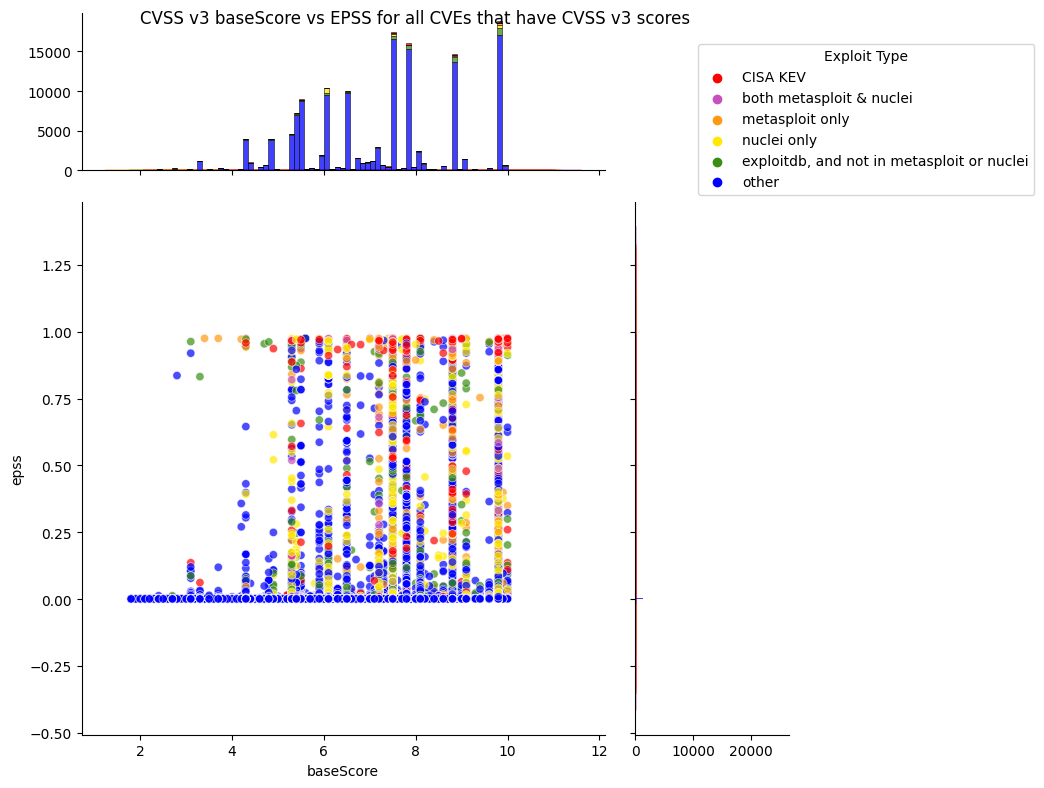

In [224]:
scatter_plot_cvss_epss(df, "CVSS v3 baseScore vs EPSS for all CVEs that have CVSS v3 scores")

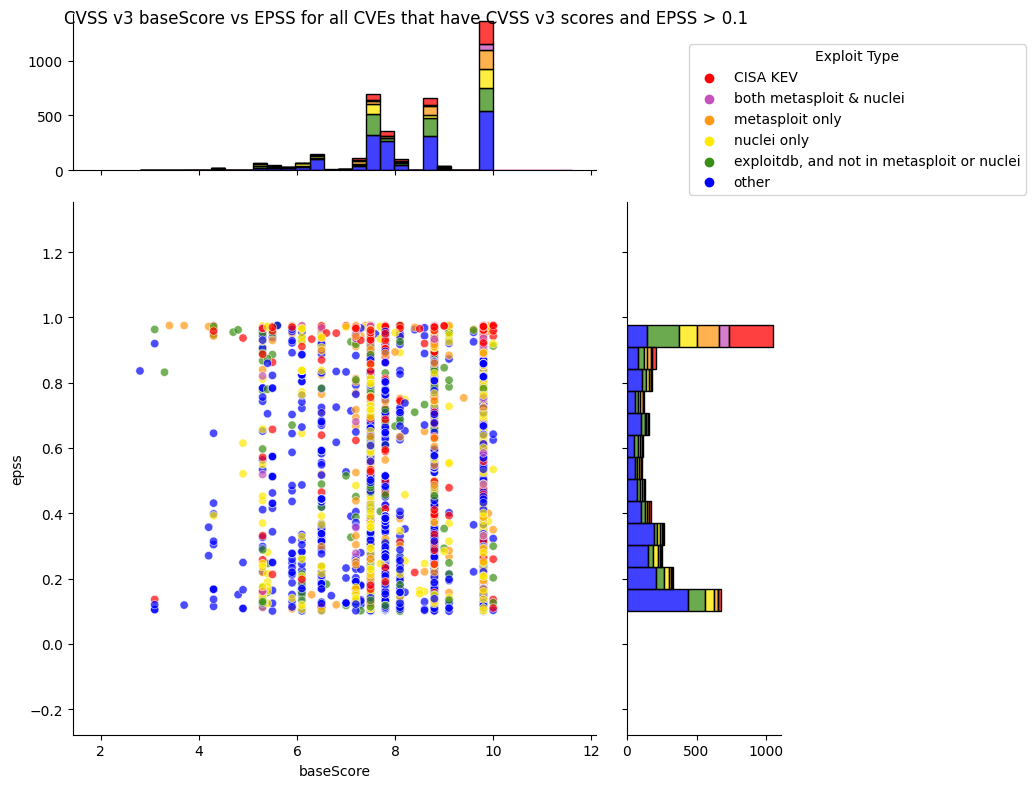

In [225]:
df_epss_01 = df[df["epss"]> 0.1]
scatter_plot_cvss_epss(df_epss_01, "CVSS v3 baseScore vs EPSS for all CVEs that have CVSS v3 scores and EPSS > 0.1")

## CISA KEV

In [226]:
# For CISA KEV plots remove cisa kev hue - otherwise everything would be the same color
def exploitatability_kev(cisa_kev, metasploit, nuclei, exploitdb):

    if (metasploit & nuclei):
        return 1
    elif (metasploit):
        return 2
    elif (nuclei):
        return 3
    elif (exploitdb):
        return 4
    else:
        return 5

In [227]:
df_cisakev["exploit_kev"]  = df_cisakev.apply(lambda x: exploitatability_kev(x['cisa_kev'], x['metasploit'], x['nuclei'], x['exploitdb']), axis=1)
df_cisakev

/var/folders/ss/mvst4cws5c9dzhhthv64hhzr0000gq/T/ipykernel_19188/365703250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cisakev["exploit_kev"]  = df_cisakev.apply(lambda x: exploitatability_kev(x['cisa_kev'], x['metasploit'], x['nuclei'], x['exploitdb']), axis=1)


,cve,baseScore,attackComplexity,attackVector,userInteraction,privilegesRequired,confidentialityImpact,integrityImpact,availabilityImpact,metasploit,nuclei,epss,exploitdb,cisa_kev,msrc,gpz,exploit,exploit_kev
316,CVE-2010-5326,10.0,LOW,NETWORK,NONE,NONE,HIGH,HIGH,HIGH,False,False,0.13576,False,True,False,False,0,5
320,CVE-2010-5330,9.8,LOW,NETWORK,NONE,NONE,HIGH,HIGH,HIGH,False,False,0.02343,False,True,False,False,0,5
1608,CVE-2014-0160,7.5,LOW,NETWORK,NONE,NONE,HIGH,NONE,NONE,True,False,0.97588,True,True,False,False,0,2
2240,CVE-2014-6271,9.8,LOW,NETWORK,NONE,NONE,HIGH,HIGH,HIGH,True,True,0.97568,True,True,False,False,0,1
2243,CVE-2014-6287,9.8,LOW,NETWORK,NONE,NONE,HIGH,HIGH,HIGH,True,True,0.97289,True,True,False,False,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140407,CVE-2023-44487,7.5,LOW,NETWORK,NONE,NONE,NONE,NONE,HIGH,False,False,0.52748,False,True,True,False,0,5
140967,CVE-2023-4863,8.8,LOW,NETWORK,REQUIRED,NONE,HIGH,HIGH,HIGH,False,False,0.41010,False,True,True,True,0,5
141040,CVE-2023-4966,7.5,LOW,NETWORK,NONE,NONE,HIGH,NONE,NONE,False,True,0.17990,False,True,False,False,0,3
141178,CVE-2023-5217,8.8,LOW,NETWORK,REQUIRED,NONE,HIGH,HIGH,HIGH,False,False,0.24402,False,True,True,True,0,5


In [228]:
# For CISA KEV plots remove cisa kev hue - otherwise everything would be the same color
def scatter_plot_cvss_epss_kev (df, Title):
    palette1 = ["#C750BD", "#FF9913", "#FFE900", "#398e14", "#0000FF"]

    g=sns.jointplot(data=df, x="baseScore", y="epss", kind='scatter', height=8, ratio=3, marginal_ticks=True, alpha=.7, hue="exploit_kev", palette=palette1)
    handles, labels = g.ax_joint.get_legend_handles_labels()
    g.ax_joint.legend(handles=handles, labels = ['both metasploit & nuclei', 'metasploit only', 'nuclei only', 'exploitdb, and not in metasploit or nuclei', 'other'],  title="Exploit Type", loc='lower center', bbox_to_anchor=(1.5, 1))
    g.plot_marginals(sns.histplot, multiple="stack")
    g.fig.suptitle(Title)

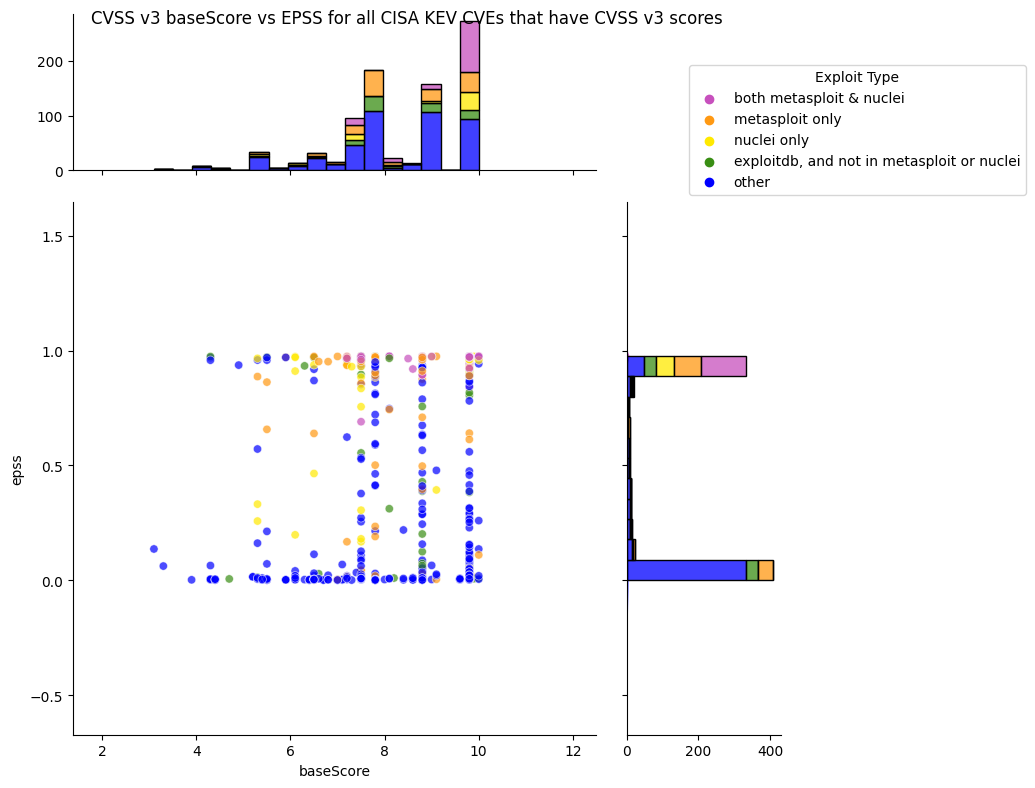

In [229]:
scatter_plot_cvss_epss_kev(df_cisakev, "CVSS v3 baseScore vs EPSS for all CISA KEV CVEs that have CVSS v3 scores")

In [230]:
# https://www.cisa.gov/news-events/cybersecurity-advisories/aa23-215a
#  Top 12 Routinely Exploited Vulnerabilities in 2022 https://www.cisa.gov/news-events/cybersecurity-advisories/aa23-215a
# Release DateAugust 03, 2023
df_top_2022 = pd.read_csv("../data_in/cisa_kev/cisa_kev_aug_22_top12.csv")
df_top_2022 = df_top_2022.rename(columns={"CVE": "cve"})
df_top_2022

,cve,Vendor,Product,Type,CWE
0,CVE-2018-13379,Fortinet,FortiOS and FortiProxy,SSL VPN credential exposure,CWE-22 Improper Limitation of a Pathname to a ...
1,CVE-2021-34473,Microsoft,Exchange Server,RCE,CWE-918 Server-Side Request Forgery (SSRF)
2,CVE-2021-31207,Microsoft,Exchange Server,Security Feature Bypass,CWE-22 Improper Limitation of a Pathname to a ...
3,CVE-2021-34523,Microsoft,Exchange Server,Elevation of Privilege,CWE-287 Improper Authentication
4,CVE-2021-40539,Zoho ManageEngine,ADSelfService Plus,RCE Authentication Bypass,CWE-287 Improper Authentication
5,CVE-2021-26084,Atlassian,Confluence Server and Data Center,Arbitrary code execution,CWE-74 Improper Neutralization of Special Elem...
6,CVE-2021-44228,Apache,Log4j2,RCE,CWE-917 Improper Neutralization of Special Ele...
7,CVE-2022-22954,VMware,Workspace ONE Access and Identity Manager,RCE,CWE-94 Improper Control of Generation of Code ...
8,CVE-2022-22960,VMware,"Workspace ONE Access, Identity Manager, and vR...",Improper Privilege Management,CWE-269 Improper Privilege Management
9,CVE-2022-1388,F5 Networks,BIG-IP,Missing Authentication Vulnerability,CWE-306 Missing Authentication for Critical Fu...


In [231]:
df_top_2022 = pd.merge(df_top_2022, df_cisakev, on='cve', how='left').fillna(False)
df_top_2022

,cve,Vendor,Product,Type,CWE,baseScore,attackComplexity,attackVector,userInteraction,privilegesRequired,...,availabilityImpact,metasploit,nuclei,epss,exploitdb,cisa_kev,msrc,gpz,exploit,exploit_kev
0,CVE-2018-13379,Fortinet,FortiOS and FortiProxy,SSL VPN credential exposure,CWE-22 Improper Limitation of a Pathname to a ...,9.8,LOW,NETWORK,NONE,NONE,...,HIGH,True,True,0.97395,True,True,False,False,0,1
1,CVE-2021-34473,Microsoft,Exchange Server,RCE,CWE-918 Server-Side Request Forgery (SSRF),9.8,LOW,NETWORK,NONE,NONE,...,HIGH,True,True,0.97344,False,True,False,False,0,1
2,CVE-2021-31207,Microsoft,Exchange Server,Security Feature Bypass,CWE-22 Improper Limitation of a Pathname to a ...,6.6,HIGH,NETWORK,NONE,HIGH,...,HIGH,True,False,0.95210,False,True,False,False,0,2
3,CVE-2021-34523,Microsoft,Exchange Server,Elevation of Privilege,CWE-287 Improper Authentication,9.8,LOW,NETWORK,NONE,NONE,...,HIGH,True,False,0.97279,False,True,False,False,0,2
4,CVE-2021-40539,Zoho ManageEngine,ADSelfService Plus,RCE Authentication Bypass,CWE-287 Improper Authentication,9.8,LOW,NETWORK,NONE,NONE,...,HIGH,True,True,0.97402,False,True,False,False,0,1
5,CVE-2021-26084,Atlassian,Confluence Server and Data Center,Arbitrary code execution,CWE-74 Improper Neutralization of Special Elem...,9.8,LOW,NETWORK,NONE,NONE,...,HIGH,True,True,0.97173,True,True,False,False,0,1
6,CVE-2021-44228,Apache,Log4j2,RCE,CWE-917 Improper Neutralization of Special Ele...,10.0,LOW,NETWORK,NONE,NONE,...,HIGH,True,True,0.97453,True,True,False,False,0,1
7,CVE-2022-22954,VMware,Workspace ONE Access and Identity Manager,RCE,CWE-94 Improper Control of Generation of Code ...,9.8,LOW,NETWORK,NONE,NONE,...,HIGH,True,True,0.97369,False,True,False,False,0,1
8,CVE-2022-22960,VMware,"Workspace ONE Access, Identity Manager, and vR...",Improper Privilege Management,CWE-269 Improper Privilege Management,7.8,LOW,LOCAL,NONE,LOW,...,HIGH,True,False,0.00090,False,True,False,False,0,2
9,CVE-2022-1388,F5 Networks,BIG-IP,Missing Authentication Vulnerability,CWE-306 Missing Authentication for Critical Fu...,9.8,LOW,NETWORK,NONE,NONE,...,HIGH,True,True,0.97154,True,True,False,False,0,1


/Users/cmadden01/work/vulnerability_scoring/vulnerability_scoring3/lib/python3.11/site-packages/seaborn/axisgrid.py:1826: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/Users/cmadden01/work/vulnerability_scoring/vulnerability_scoring3/lib/python3.11/site-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/Users/cmadden01/work/vulnerability_scoring/vulnerability_scoring3/lib/python3.11/site-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)
/Users/cmadden01/work/vulnerability_scoring/vulnerability_scoring3/lib/python3.11/site-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  func(

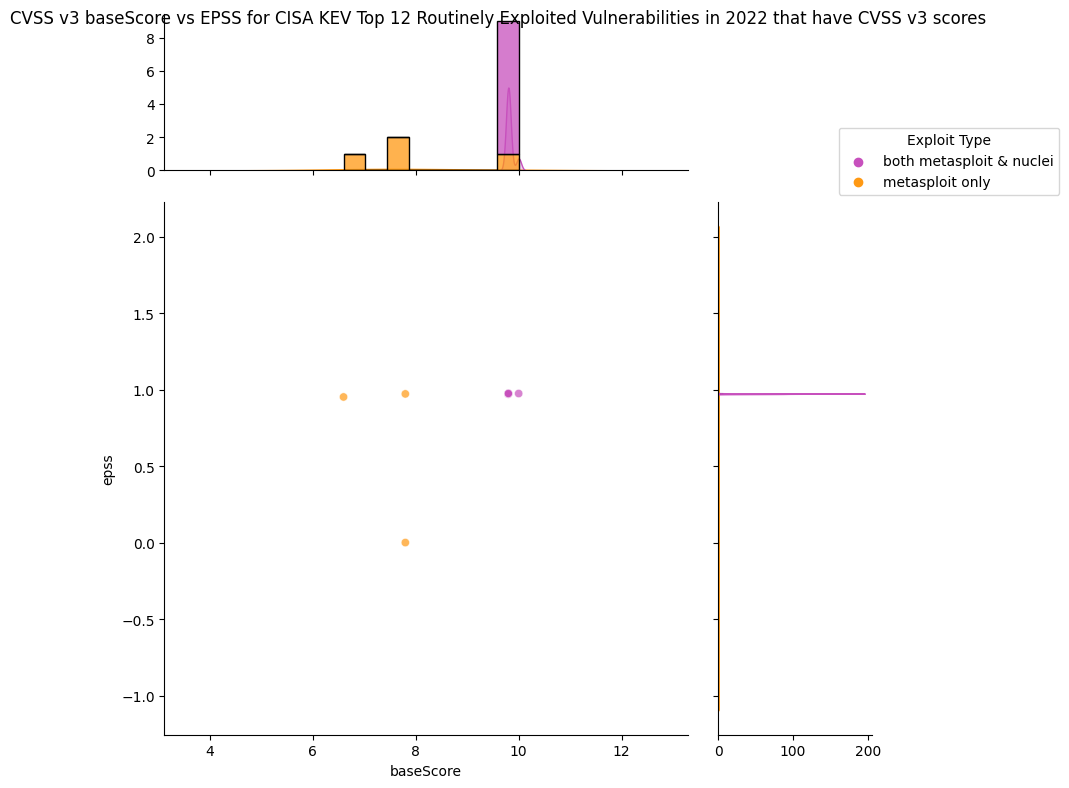

In [232]:
scatter_plot_cvss_epss_kev(df_top_2022, "CVSS v3 baseScore vs EPSS for CISA KEV Top 12 Routinely Exploited Vulnerabilities in 2022 that have CVSS v3 scores")

In [233]:
df_top_2022_other = pd.read_csv("../data_in/cisa_kev/cisa_kev_aug_22_other.csv")
df_top_2022_other = df_top_2022_other.rename(columns={"CVE": "cve"})
df_top_2022_other

,cve,Vendor,Product,Type,CWE
0,CVE-2017-0199,Microsoft,Multiple Products,Arbitrary Code Execution,None Listed
1,CVE-2017-11882,Microsoft,Exchange Server,Arbitrary Code Execution,CWE-119: Improper Restriction of Operations wi...
2,CVE-2019-11510,Ivanti,Pulse Secure Pulse Connect Secure,Arbitrary File Reading,CWE-22: Improper Limitation of a Pathname to a...
3,CVE-2019-0708,Microsoft,Remote Desktop Services,RCE,CWE-416: Use After Free
4,CVE-2019-19781,Citrix,Application Delivery Controller and Gateway,Arbitrary Code Execution,CWE-22: Improper Limitation of a Pathname to a...
5,CVE-2020-5902,F5 Networks,BIG-IP,RCE,CWE-22: Improper Limitation of a Pathname to a...
6,CVE-2020-1472,Microsoft,Multiple Products,Privilege Escalation,CWE-330: Use of Insufficiently Random Values
7,CVE-2020-14882,Oracle,WebLogic Server,RCE,None Listed
8,CVE-2020-14883,Oracle,WebLogic Server,RCE,None Listed
9,CVE-2021-20016,SonicWALL,SSLVPN SMA100,SQL Injection,CWE-89: Improper Neutralization of Special Ele...


In [234]:
df_top_2022_other = pd.merge(df_top_2022_other, df_cisakev, on='cve', how='left').fillna(False)
df_top_2022_other

,cve,Vendor,Product,Type,CWE,baseScore,attackComplexity,attackVector,userInteraction,privilegesRequired,...,availabilityImpact,metasploit,nuclei,epss,exploitdb,cisa_kev,msrc,gpz,exploit,exploit_kev
0,CVE-2017-0199,Microsoft,Multiple Products,Arbitrary Code Execution,None Listed,7.8,LOW,LOCAL,REQUIRED,NONE,...,HIGH,True,False,0.97445,True,True,False,True,0,2
1,CVE-2017-11882,Microsoft,Exchange Server,Arbitrary Code Execution,CWE-119: Improper Restriction of Operations wi...,7.8,LOW,LOCAL,REQUIRED,NONE,...,HIGH,True,False,0.97422,True,True,False,False,0,2
2,CVE-2019-11510,Ivanti,Pulse Secure Pulse Connect Secure,Arbitrary File Reading,CWE-22: Improper Limitation of a Pathname to a...,10.0,LOW,NETWORK,NONE,NONE,...,HIGH,True,True,0.97278,True,True,False,False,0,1
3,CVE-2019-0708,Microsoft,Remote Desktop Services,RCE,CWE-416: Use After Free,9.8,LOW,NETWORK,NONE,NONE,...,HIGH,True,False,0.97505,True,True,False,False,0,2
4,CVE-2019-19781,Citrix,Application Delivery Controller and Gateway,Arbitrary Code Execution,CWE-22: Improper Limitation of a Pathname to a...,9.8,LOW,NETWORK,NONE,NONE,...,HIGH,True,True,0.97515,True,True,False,False,0,1
5,CVE-2020-5902,F5 Networks,BIG-IP,RCE,CWE-22: Improper Limitation of a Pathname to a...,9.8,LOW,NETWORK,NONE,NONE,...,HIGH,True,True,0.97559,True,True,False,False,0,1
6,CVE-2020-1472,Microsoft,Multiple Products,Privilege Escalation,CWE-330: Use of Insufficiently Random Values,10.0,LOW,NETWORK,NONE,NONE,...,HIGH,True,False,0.97368,True,True,False,False,0,2
7,CVE-2020-14882,Oracle,WebLogic Server,RCE,None Listed,9.8,LOW,NETWORK,NONE,NONE,...,HIGH,True,True,0.97454,True,True,False,False,0,1
8,CVE-2020-14883,Oracle,WebLogic Server,RCE,None Listed,7.2,LOW,NETWORK,NONE,HIGH,...,HIGH,True,True,0.97273,False,True,False,False,0,1
9,CVE-2021-20016,SonicWALL,SSLVPN SMA100,SQL Injection,CWE-89: Improper Neutralization of Special Ele...,9.8,LOW,NETWORK,NONE,NONE,...,HIGH,False,False,0.01935,False,True,False,False,0,5


/Users/cmadden01/work/vulnerability_scoring/vulnerability_scoring3/lib/python3.11/site-packages/seaborn/axisgrid.py:1826: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/Users/cmadden01/work/vulnerability_scoring/vulnerability_scoring3/lib/python3.11/site-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/Users/cmadden01/work/vulnerability_scoring/vulnerability_scoring3/lib/python3.11/site-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)
/Users/cmadden01/work/vulnerability_scoring/vulnerability_scoring3/lib/python3.11/site-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(

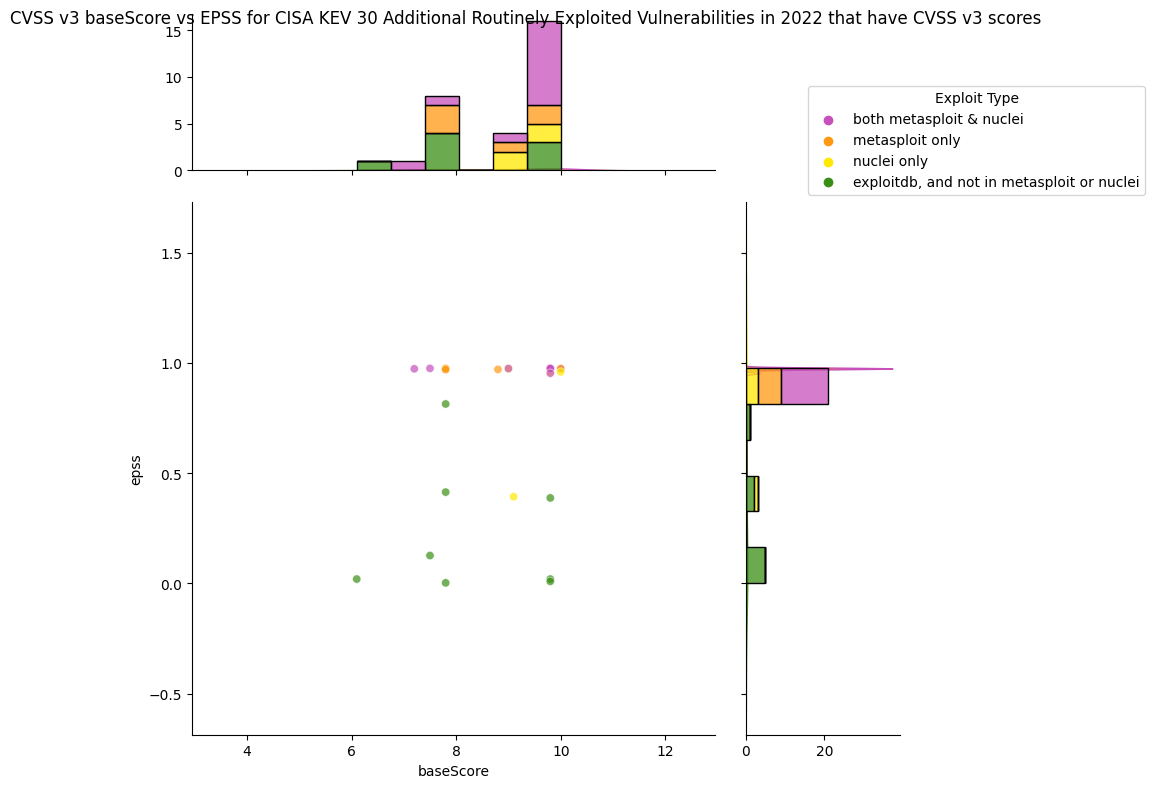

In [235]:
scatter_plot_cvss_epss_kev(df_top_2022_other, "CVSS v3 baseScore vs EPSS for CISA KEV 30 Additional Routinely Exploited Vulnerabilities in 2022 that have CVSS v3 scores")